In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [12]:
df_desmatamento = pd.read_csv('desmatamento_ucs.csv', encoding='latin1', sep=";")
df_especies = pd.read_csv('pda-especies_ameacadas.csv', encoding='latin1', sep=";")


In [13]:
#tratamento dos dados
## limpeza dos dados
df_especies = df_especies[['Nome Científico', 'Nome Comum','Grupo', 'Categoria', 'Estado', 'Região', 'Unidade de Conservação Federal']]

df_especies_sem_null = df_especies.dropna(subset='Nome Científico') #limpeza dos dados nulos

#tratamento das categorias repetidas / agrupamento
mascara_vulneravel = df_especies_sem_null['Categoria'] == 'Vulnerável (VU)'
df_especies_sem_null.loc[mascara_vulneravel, 'Categoria'] = 'Vulnerável'

mascara_em_perigo = df_especies_sem_null['Categoria'] == 'Em Perigo (EN)'
df_especies_sem_null.loc[mascara_em_perigo, 'Categoria'] = 'Em Perigo'

mascara_criticamente_em_perigo = df_especies_sem_null['Categoria'] == 'Criticamente em Perigo (CR)'
df_especies_sem_null.loc[mascara_criticamente_em_perigo, 'Categoria'] = 'Criticamente em Perigo'

mascara_extinta= (df_especies_sem_null['Categoria'] == 'Regionalmente Extinta') | (df_especies_sem_null['Categoria'] == 'Extinta na Natureza')
df_especies_sem_null.loc[mascara_extinta, 'Categoria'] = 'Extinta'

df_especies_tratado = df_especies_sem_null

C:\Users\edugc\AppData\Local\Temp\ipykernel_12196\247097414.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_especies_sem_null.loc[mascara_vulneravel, 'Categoria'] = 'Vulnerável'
C:\Users\edugc\AppData\Local\Temp\ipykernel_12196\247097414.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_especies_sem_null.loc[mascara_em_perigo, 'Categoria'] = 'Em Perigo'
C:\Users\edugc\AppData\Local\Temp\ipykernel_12196\247097414.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

'\ninsights:\né possível observar que a população de espécies com um grau de risco de extinção mais elevado são menos numerosas\nque as espécies com um grau de risco de extinção menos elevado.\n\n'

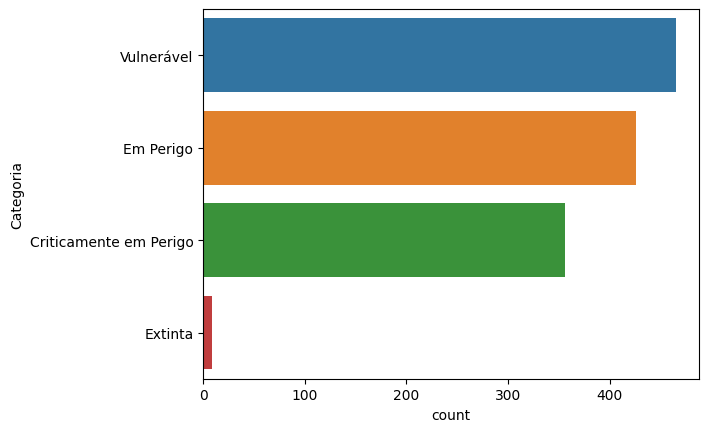

In [6]:
#qual a quantidade de espécies por categoria de extinção?
sns.countplot(df_especies_tratado, y="Categoria", order = df_especies_tratado["Categoria"].value_counts().index.tolist())

'''
insights:
é possível observar que a população de espécies com um grau de risco de extinção mais elevado são menos numerosas
que as espécies com um grau de risco de extinção menos elevado.

'''

C:\Users\edugc\AppData\Local\Temp\ipykernel_12196\762483123.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_especies_com_coluna_ucf['Localizada em UCF'] = mascara_com_uc


' \ninsights:\n\nÉ possível observar não existe nenhuma espécie extinta que estava protegida em uma unidade de conservação federal\nAlém disso, é possivel notar que as espécies com um grau de risco de extinção mais elevado estão em menor quantidade nas unidades de conservação, se comparadas\nas espécies que não estão protegidas por uma unidade de conservação\n'

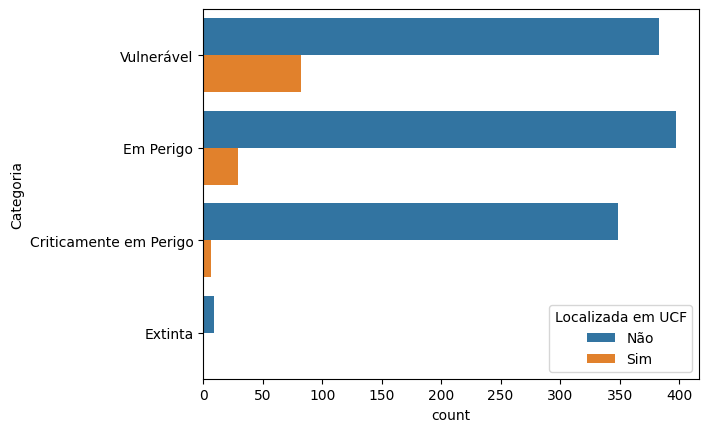

In [14]:
#qual a quantidade de espécies por categoria de extinção em unidades de conservação?
mascara_sem_uc = df_especies_tratado['Unidade de Conservação Federal'].isnull()
mascara_com_uc = (~mascara_sem_uc)

df_especies_com_coluna_ucf = df_especies_tratado
df_especies_com_coluna_ucf['Localizada em UCF'] = mascara_com_uc
df_especies_tratado.loc[mascara_com_uc, 'Localizada em UCF'] = 'Sim'
df_especies_tratado.loc[mascara_sem_uc, 'Localizada em UCF'] = 'Não'

df_especies_com_coluna_ucf['Localizada em UCF'].value_counts()

sns.countplot(df_especies_com_coluna_ucf, y="Categoria", hue='Localizada em UCF', order = df_especies_com_coluna_ucf["Categoria"].value_counts().index.tolist())

''' 
insights:

É possível observar não existe nenhuma espécie extinta que estava protegida em uma unidade de conservação federal
Além disso, é possivel notar que as espécies com um grau de risco de extinção mais elevado estão em menor quantidade nas unidades de conservação, se comparadas
as espécies que não estão protegidas por uma unidade de conservação
'''

Qual a distribuição de espécies por grupo (mamífero, ave, peixe, ...)?
Qual a distribuição de cada grupo em relação ao risco de extinção?

Distribuição de espécies por grupo

Text(0.5, 0, 'Qtd de espécies')

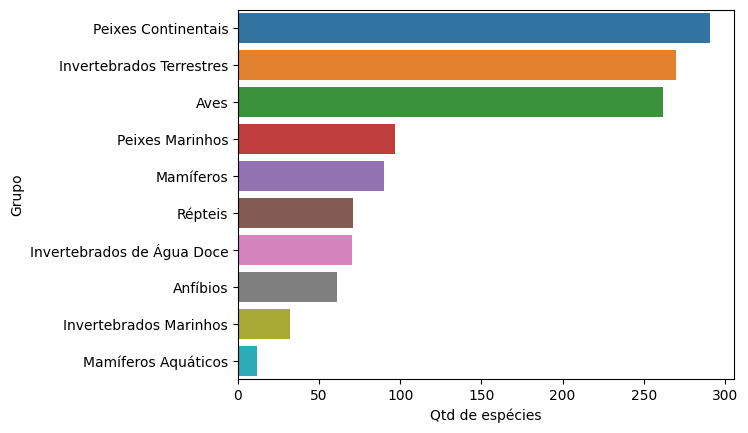

In [30]:
ax = sns.countplot(data=df_especies_tratado, y='Grupo', order=df_especies_tratado['Grupo'].value_counts().index.tolist())
# Definir o rótulo do eixo x
ax.set_xlabel('Qtd de espécies')

Distribuição de espécies vulneráveis por grupo.

Text(0.5, 0, 'Qtd de espécies vulneráveis')

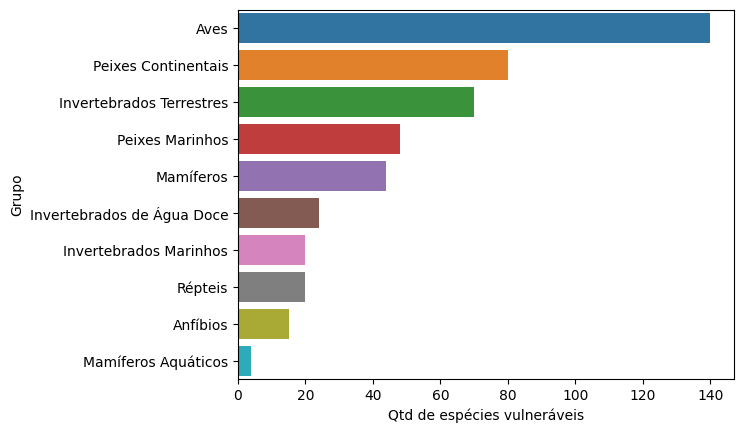

In [45]:
df_vulneravel = df_especies_tratado[df_especies_tratado['Categoria'] == 'Vulnerável']
ax1 = sns.countplot(data=df_vulneravel, y='Grupo', order=df_vulneravel['Grupo'].value_counts().index.tolist())
# Definir o rótulo do eixo x
ax1.set_xlabel('Qtd de espécies vulneráveis')


Distribuição de espécies em perigo por grupo.

Text(0.5, 0, 'Qtd de espécies em perigo')

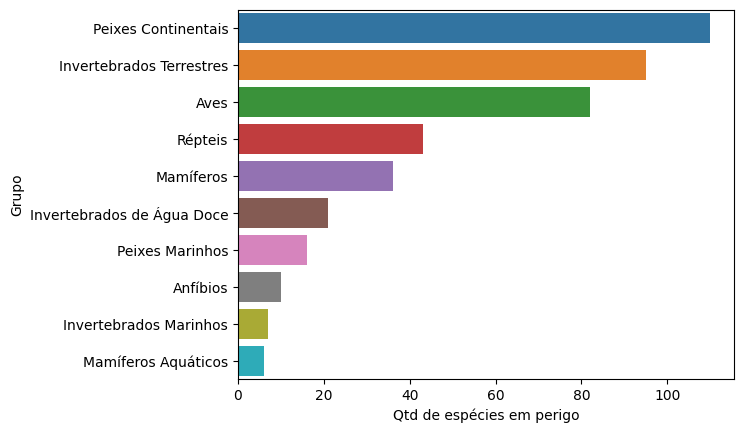

In [46]:
df_em_perigo = df_especies_tratado[df_especies_tratado['Categoria'] == 'Em Perigo']
ax2 = sns.countplot(data=df_em_perigo, y='Grupo', order=df_em_perigo['Grupo'].value_counts().index.tolist())
# Definir o rótulo do eixo x
ax2.set_xlabel('Qtd de espécies em perigo')

Distribuição de espécies criticamente em perigo por grupo.

Text(0.5, 0, 'Qtd de espécies criticamente em perigo')

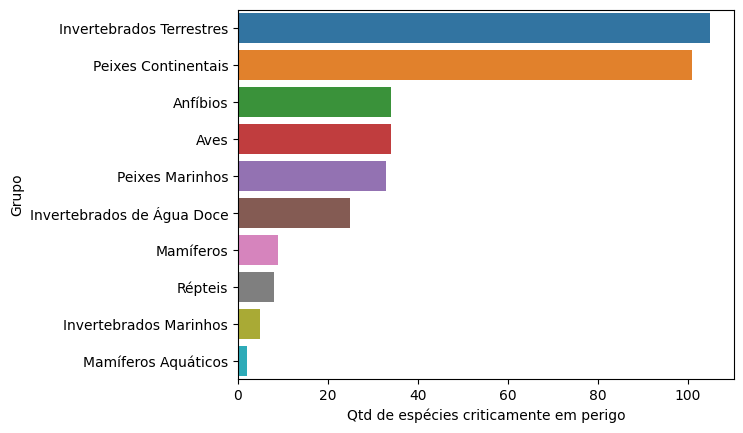

In [47]:
df_criticamente_em_perigo = df_especies_tratado[df_especies_tratado['Categoria'] == 'Criticamente em Perigo']
ax3 = sns.countplot(data=df_criticamente_em_perigo, y='Grupo', order=df_criticamente_em_perigo['Grupo'].value_counts().index.tolist())
# Definir o rótulo do eixo x
ax3.set_xlabel('Qtd de espécies criticamente em perigo')

Distribuição de espécies extintas por grupo.

Text(0.5, 0, 'Qtd de espécies criticamente em perigo')

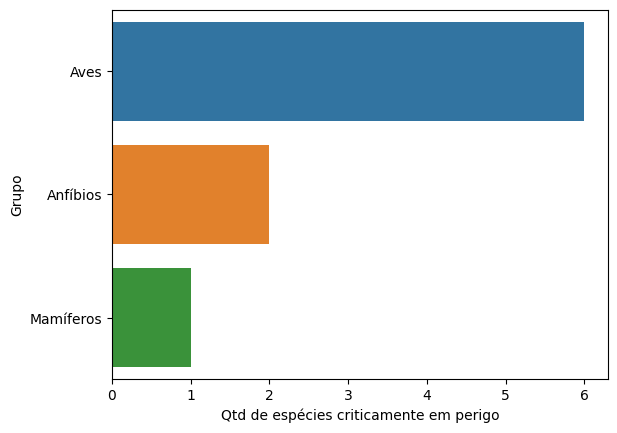

In [48]:
df_extinta = df_especies_tratado[df_especies_tratado['Categoria'] == 'Extinta']
ax4 = sns.countplot(data=df_extinta, y='Grupo', order=df_extinta['Grupo'].value_counts().index.tolist())
# Definir o rótulo do eixo x
ax4.set_xlabel('Qtd de espécies criticamente em perigo')

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

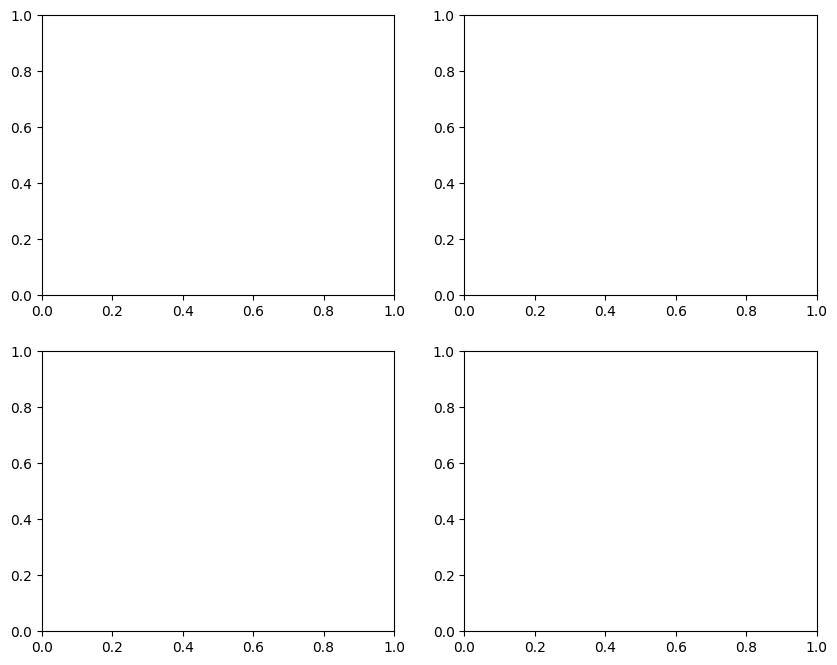

In [49]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(x, ax1)
axs[0, 0].set_title('Gráfico 1')

axs[0, 1].plot(x, ax2)
axs[0, 1].set_title('Gráfico 2')

axs[1, 0].plot(x, ax3)
axs[1, 0].set_title('Gráfico 3')

axs[1, 1].plot(x, ax4)
axs[1, 1].set_title('Gráfico 4')

plt.tight_layout()
plt.show()